In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [28]:
NOAA_20_file = "data/NOAA_20_{year}.csv"
SNPP_file = "data/SNPP_{year}.csv"
NOAA_20_data = []
SNPP_data = []

for year in [2022, 2023, 2024]:
    NOAA_20_file = NOAA_20_file.format(year=year)
    SNPP_file = SNPP_file.format(year=year)
    # Read the NOAA-20 data and the SNPP data
    firms_data_NOAA_20 = pd.read_csv(NOAA_20_file)
    firms_data_SNPP = pd.read_csv(SNPP_file)
    # Append the data to the list
    NOAA_20_data.append(firms_data_NOAA_20)
    SNPP_data.append(firms_data_SNPP)

NOAA_20_data = pd.concat(NOAA_20_data, ignore_index=True)
SNPP_data = pd.concat(SNPP_data, ignore_index=True)

In [41]:
NOAA_20_data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,month
0,53.54453,-113.38434,333.30,0.39,0.36,2022-01-01,950,N20,VIIRS,n,2,250.46,3.74,N,0,January
1,51.25266,-114.85198,328.63,0.39,0.36,2022-01-01,951,N20,VIIRS,n,2,254.24,13.16,N,0,January
2,50.58922,-116.12242,332.94,0.38,0.36,2022-01-01,951,N20,VIIRS,n,2,243.13,3.33,N,0,January
3,51.25427,-114.85426,322.16,0.43,0.38,2022-01-02,932,N20,VIIRS,n,2,262.44,2.35,N,0,January
4,48.18796,-64.92238,298.91,0.49,0.65,2022-01-03,731,N20,VIIRS,n,2,260.58,1.07,N,2,January


In [42]:
SNPP_data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,53.54358,-113.38571,333.56,0.50,0.49,2022-01-01,901,N,VIIRS,n,2,248.05,3.91,N,0
1,53.54370,-113.38420,335.57,0.50,0.49,2022-01-01,901,N,VIIRS,n,2,247.53,5.87,N,0
2,51.25153,-114.84995,336.03,0.55,0.51,2022-01-01,902,N,VIIRS,n,2,249.69,10.38,N,0
3,58.60472,-117.07857,325.14,0.49,0.40,2022-01-01,1041,N,VIIRS,n,2,240.95,4.98,N,0
4,53.54116,-113.37887,323.80,0.61,0.53,2022-01-01,1042,N,VIIRS,n,2,244.60,5.44,N,0


In [29]:
print("NOAA 20 Data:")
NOAA_20_data.info()

NOAA 20 Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530607 entries, 0 to 530606
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    530607 non-null  float64
 1   longitude   530607 non-null  float64
 2   brightness  530607 non-null  float64
 3   scan        530607 non-null  float64
 4   track       530607 non-null  float64
 5   acq_date    530607 non-null  object 
 6   acq_time    530607 non-null  int64  
 7   satellite   530607 non-null  object 
 8   instrument  530607 non-null  object 
 9   confidence  530607 non-null  object 
 10  version     530607 non-null  int64  
 11  bright_t31  530607 non-null  float64
 12  frp         530607 non-null  float64
 13  daynight    530607 non-null  object 
 14  type        530607 non-null  int64  
dtypes: float64(7), int64(3), object(5)
memory usage: 60.7+ MB


In [30]:
print("SNPP Data:")
SNPP_data.info()

SNPP Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508566 entries, 0 to 508565
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    508566 non-null  float64
 1   longitude   508566 non-null  float64
 2   brightness  508566 non-null  float64
 3   scan        508566 non-null  float64
 4   track       508566 non-null  float64
 5   acq_date    508566 non-null  object 
 6   acq_time    508566 non-null  int64  
 7   satellite   508566 non-null  object 
 8   instrument  508566 non-null  object 
 9   confidence  508566 non-null  object 
 10  version     508566 non-null  int64  
 11  bright_t31  508566 non-null  float64
 12  frp         508566 non-null  float64
 13  daynight    508566 non-null  object 
 14  type        508566 non-null  int64  
dtypes: float64(7), int64(3), object(5)
memory usage: 58.2+ MB


In [31]:
print(NOAA_20_data.isnull().sum())
print(SNPP_data.isnull().sum())

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64
latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64


In [33]:
NOAA_20_data.describe()

,latitude,longitude,brightness,scan,track,acq_time,version,bright_t31,frp,type
count,530607.000000,530607.000000,530607.000000,530607.000000,530607.000000,530607.000000,530607.0,530607.000000,530607.000000,530607.000000
mean,57.811209,-114.336623,326.615255,0.462268,0.479476,1450.466605,2.0,289.119085,16.195763,0.153713
std,5.518609,13.526522,21.510883,0.087105,0.115974,538.619111,0.0,13.508138,43.953189,0.600006
min,41.994490,-140.924710,207.930000,0.320000,0.360000,501.000000,2.0,229.240000,0.000000,0.000000
25%,55.416270,-122.569820,306.350000,0.400000,0.380000,942.000000,2.0,281.690000,1.750000,0.000000
50%,59.120840,-117.166300,328.730000,0.440000,0.440000,1135.000000,2.0,287.890000,4.230000,0.000000
75%,61.947910,-109.548200,342.830000,0.510000,0.560000,2015.000000,2.0,296.460000,11.670000,0.000000
max,73.036930,-52.666080,367.000000,0.800000,0.780000,2338.000000,2.0,380.090000,1828.830000,3.000000


In [ ]:
SNPP_data.describe()

,latitude,longitude,brightness,scan,track,acq_time,version,bright_t31,frp,type
count,508566.000000,508566.000000,508566.000000,508566.000000,508566.000000,508566.000000,508566.0,508566.000000,508566.000000,508566.000000
mean,58.014870,-114.753935,326.866940,0.462363,0.480160,1453.295920,2.0,288.934933,15.047165,0.147450
std,5.352487,12.748357,21.755984,0.088743,0.117936,537.484281,0.0,13.633992,38.861480,0.587675
min,42.035950,-140.937330,208.000000,0.320000,0.360000,455.000000,2.0,225.810000,0.000000,0.000000
25%,55.584130,-122.584500,306.100000,0.400000,0.380000,950.000000,2.0,281.590000,1.730000,0.000000
50%,59.331225,-117.358330,328.870000,0.440000,0.440000,1144.000000,2.0,287.480000,4.230000,0.000000
75%,61.981140,-109.584770,343.330000,0.510000,0.560000,2014.000000,2.0,296.250000,11.510000,0.000000
max,79.704610,-53.038920,367.000000,0.800000,0.780000,2337.000000,2.0,385.540000,2331.130000,3.000000


In [ ]:
## Filtering out points with low confidence
rows = (NOAA_20_data.shape[0], SNPP_data.shape[0])
NOAA_20_data = NOAA_20_data[NOAA_20_data['confidence'].isin(['n', 'h'])]
SNPP_data = SNPP_data[SNPP_data['confidence'].isin(['n', 'h'])]
rows_after = (NOAA_20_data.shape[0], SNPP_data.shape[0])
print(f"Rows before filtering: {rows}")
print(f"Rows after filtering: {rows_after}")

In [ ]:
# Convert acquisition date to datetime format
NOAA_20_data['acq_date'] = pd.to_datetime(NOAA_20_data['acq_date'])

# Step 2: Load the Canada provinces shapefile
# Note: Adjust the path and layer details based on your file.
provinces = gpd.read_file("data/province_Data/gpr_000b11a_e.shp")

# Inspect the provinces GeoDataFrame to see which column contains the province name.
print(provinces.columns)

# Step 3: Convert FIRMS data to a GeoDataFrame using the latitude and longitude columns
fire_gdf = gpd.GeoDataFrame(
    NOAA_20_data, 
    geometry=gpd.points_from_xy(NOAA_20_data.longitude, NOAA_20_data.latitude),
    crs="EPSG:4326"
)

# Step 4: Spatially join the fire points with the province boundaries
# This attaches the province information to each fire record based on location.
fire_with_province = gpd.sjoin(fire_gdf, provinces, how="left", predicate="intersects")

Index(['PRUID', 'PRNAME', 'PRENAME', 'PRFNAME', 'PREABBR', 'PRFABBR',
       'geometry'],
      dtype='object')


/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_38638/2053926172.py:25: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  fire_with_province = gpd.sjoin(fire_gdf, provinces, how="left", predicate="intersects")


In [39]:
fire_with_province

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,type,month,geometry,index_right,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR
0,53.54453,-113.38434,333.30,0.39,0.36,2022-01-01,950,N20,VIIRS,n,...,0,January,POINT (-113.38434 53.54453),10.0,48,Alberta,Alberta,Alberta,Alta.,Alb.
1,51.25266,-114.85198,328.63,0.39,0.36,2022-01-01,951,N20,VIIRS,n,...,0,January,POINT (-114.85198 51.25266),10.0,48,Alberta,Alberta,Alberta,Alta.,Alb.
2,50.58922,-116.12242,332.94,0.38,0.36,2022-01-01,951,N20,VIIRS,n,...,0,January,POINT (-116.12242 50.58922),0.0,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.
3,51.25427,-114.85426,322.16,0.43,0.38,2022-01-02,932,N20,VIIRS,n,...,0,January,POINT (-114.85426 51.25427),10.0,48,Alberta,Alberta,Alberta,Alta.,Alb.
4,48.18796,-64.92238,298.91,0.49,0.65,2022-01-03,731,N20,VIIRS,n,...,2,January,POINT (-64.92238 48.18796),1.0,24,Quebec / Québec,Quebec,Québec,Que.,Qc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530602,56.17217,-122.40636,299.90,0.40,0.45,2022-12-31,1106,N20,VIIRS,n,...,0,December,POINT (-122.40636 56.17217),0.0,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.
530603,56.16853,-122.40988,306.41,0.40,0.45,2022-12-31,1106,N20,VIIRS,n,...,0,December,POINT (-122.40988 56.16853),0.0,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.
530604,49.86208,-113.41077,309.33,0.71,0.75,2022-12-31,1107,N20,VIIRS,n,...,0,December,POINT (-113.41077 49.86208),10.0,48,Alberta,Alberta,Alberta,Alta.,Alb.
530605,49.86541,-113.41940,301.67,0.71,0.75,2022-12-31,1107,N20,VIIRS,n,...,0,December,POINT (-113.4194 49.86541),10.0,48,Alberta,Alberta,Alberta,Alta.,Alb.


Top three provinces with most wildfires:
PRNAME
Northwest Territories / Territoires du Nord-Ouest    183591
British Columbia / Colombie-Britannique               99933
Alberta                                               65157
Name: count, dtype: int64
Top four months with most wildfires:
month
July         189960
August       139152
September     64770
October       64626
Name: count, dtype: int64


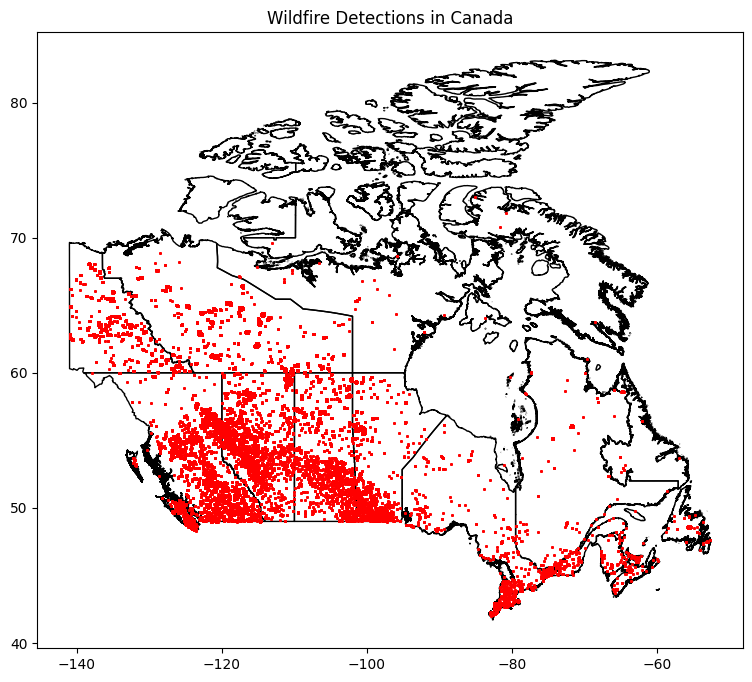

In [40]:
# Step 5: Group by province to get counts of fire detections per province
# Adjust 'NAME' to the appropriate column name in your provinces shapefile if different.
top_provinces = fire_with_province['PRNAME'].value_counts().head(3)
print("Top three provinces with most wildfires:")
print(top_provinces)

# Step 6: Extract the month name from the acquisition date for temporal analysis
NOAA_20_data['month'] = NOAA_20_data['acq_date'].dt.month_name()

# Count the number of fire events per month and get the top four months
top_months = NOAA_20_data['month'].value_counts().head(4)
print("Top four months with most wildfires:")
print(top_months)

# Optional: Plotting the fire locations for a visual check (e.g., using a simple plot)
fig, ax = plt.subplots(figsize=(10, 8))
provinces.plot(ax=ax, color='none', edgecolor='black')
fire_gdf.plot(ax=ax, markersize=1, color='red')
plt.title("Wildfire Detections in Canada")
plt.show()

In [23]:
provinces

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((-123.53977 48.31735, -123.5397..."
1,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((-74.63814 44.99984, -74.63859 ..."
2,62,Nunavut,Nunavut,Nunavut,Nvt.,Nt,"MULTIPOLYGON (((-79.99352 51.27725, -79.99475 ..."
3,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((-62.49302 46.02515, -62.49337 ..."
4,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((-102 60, -102 59.99991, -102 59.9999..."
5,60,Yukon,Yukon,Yukon,Y.T.,Yn,"MULTIPOLYGON (((-136.47224 68.89388, -136.4705..."
6,46,Manitoba,Manitoba,Manitoba,Man.,Man.,"MULTIPOLYGON (((-95.15588 49.59155, -95.15657 ..."
7,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((-82.68871 41.68453, -82.68631 ..."
8,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((-66.76541 44.58377, -66.76462 ..."
9,61,Northwest Territories / Territoires du Nord-Ouest,Northwest Territories,Territoires du Nord-Ouest,N.W.T.,T.N.-O.,"MULTIPOLYGON (((-133.43943 68.78677, -133.443 ..."
